<a href="https://colab.research.google.com/github/gridface/ml-technical-analysis/blob/main/centaur_portfolio_projection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Analysis with Pandas

## Define Your Variables

In [1]:
#here we define an array of stock tickers that will be fed into our program.
#change these tickers as desired
portfolio = ["ZIM", "T", "MOS", "VALE", "ENB", "ADM" ]

#what period do you want to evaluate?
# use "period" instead of start/end
# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
# (optional, default is '1mo')
per = "1y"

## Notebook Setup

In [2]:
#this block is to point jupyter to our custom libraries
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('/libs'))
sys.path.insert(0, module_path)

#****************
# uncomment this block to install the yahoo finance api library for standalone and hosted jupyter notebooks. 
# !pip install yfinance
# import yfinance as yf
#****************

# once it is installed, we can import it like any other installed library
#pandas and matplotlib libraries are already part of colab, so we just import them
import pandas as pd, matplotlib.pyplot as plt

#to run the full app, pull in our custom libraries
import libs.collector as collector
import libs.indicators as indicators
#import libs.dbloader as dbloader

#general note on running notebooks: if you get an "undefined" type error, remember that you have to 
#run each of the cells in order sequentially first in order to "define" the variables
#and execute the commands. so if you get the "undefined" error, go back up and make sure you 
#have run all the lines that came before your troublesome line of code


## Get Your Portfolio Data

In [3]:
#notice the format of this data - it has a two-tiered header - [measurement]/[ticker]
# we will be changing this around below to make it easier to work with

#****************
#run this codeblock if you are running jupyter notebook as a standalone
# stocks = yf.download(portfolio,period=per)
#convert the time index to datetime type. this lets us do special date functions
# pd.to_datetime(stocks.iloc[0])
#****************

stocks = collector.get_yfinance_stocks(portfolio,per)

stocks

[*********************100%***********************]  6 of 6 completed


Adj Close                                                         \
                  ADM        ENB        MOS          T       VALE        ZIM   
Date                                                                           
2022-01-14  70.217239  39.153576  42.793060  19.343103  14.575356  39.330956   
2022-01-18  69.942444  39.632893  43.169224  19.435616  14.698555  39.108677   
2022-01-19  69.677475  39.595303  41.516102  19.414268  15.333502  37.991104   
2022-01-20  67.606781  39.256962  40.120350  19.229233  15.153441  37.873795   
2022-01-21  67.655853  38.354721  38.912689  18.937449  14.783846  35.885635   
...               ...        ...        ...        ...        ...        ...   
2023-01-09  85.370003  41.000000  47.200001  19.040001  17.520000  17.059999   
2023-01-10  86.230003  40.980000  44.830002  19.469999  17.959999  17.530001   
2023-01-11  86.680000  41.310001  45.220001  19.410000  17.900000  17.420000   
2023-01-12  87.389999  41.919998  46.980000  19.410000  18.379999  17.139999   
2023-01-13  88.400002  41.759998  46.320000  19.549999  18.430000  17.010000   

                Close                                   ...       Open  \
                  ADM        ENB        MOS          T  ...        MOS   
Date                                                    ...              
2022-01-14  71.550003  41.660000  43.230000  20.528702  ...  42.849998   
2022-01-18  71.269997  42.169998  43.610001  20.626888  ...  42.900002   
2022-01-19  71.000000  42.130001  41.939999  20.604231  ...  43.270000   
2022-01-20  68.889999  41.770000  40.529999  20.407854  ...  41.990002   
2022-01-21  68.940002  40.810001  39.310001  20.098186  ...  40.060001   
...               ...        ...        ...        ...  ...        ...   
2023-01-09  85.370003  41.000000  47.200001  19.040001  ...  46.709999   
2023-01-10  86.230003  40.980000  44.830002  19.469999  ...  47.630001   
2023-01-11  86.680000  41.310001  45.220001  19.410000  ...  44.889999   
2023-01-12  87.389999  41.919998  46.980000  19.410000  ...  45.330002   
2023-01-13  88.400002  41.759998  46.320000  19.549999  ...  45.070000   

                                              Volume                     \
                    T       VALE        ZIM      ADM       ENB      MOS   
Date                                                                      
2022-01-14  20.105740  15.060000  62.000000  1757300   4243100  6419400   
2022-01-18  20.551359  15.530000  62.610001  2094000   7259000  5102100   
2022-01-19  20.732628  16.139999  63.750000  2638500   7149400  4603200   
2022-01-20  20.490936  16.370001  62.459999  3803700   7449700  4546000   
2022-01-21  20.271902  15.930000  60.500000  5093300  10735400  5003000   
...               ...        ...        ...      ...       ...      ...   
2023-01-09  19.240000  17.459999  17.459999  3935900   2397500  4823900   
2023-01-10  19.350000  17.799999  17.049999  2615000   2209600  4336400   
2023-01-11  19.469999  18.059999  17.309999  2692500   1871600  4701900   
2023-01-12  19.480000  18.190001  17.400000  2813100   2613000  4347100   
2023-01-13  19.389999  18.260000  17.000000  2488300   3010600  4315900   

                                         
                   T      VALE      ZIM  
Date                                     
2022-01-14  72617163  25261600  2479100  
2022-01-18  80247772  30724100  3122900  
2022-01-19  67442309  36933100  2950200  
2022-01-20  55659239  35470000  2719200  
2022-01-21  79715392  45786200  5136600  
...              ...       ...      ...  
2023-01-09  51981100  22693900  4061800  
2023-01-10  32869500  28056900  3192100  
2023-01-11  30010200  21824200  4009800  
2023-01-12  31740400  17878300  4495500  
2023-01-13  25476000  16543700  3915000  

[251 rows x 36 columns]

In [4]:
#Use this for jupyter standalone
# #this step flattens out the index 
# stocks.columns = stocks.columns.to_flat_index()

# #creates a multiindex for better sorting and grouping of data
# # check this link for more info https://pandas.pydata.org/docs/user_guide/advanced.html
# stocks.columns = pd.MultiIndex.from_tuples(stocks.columns)

# #lets switch levels now so we can group on individual stocks at the top level
# stocks.swaplevel(axis = 1).sort_index(axis=1)

In [5]:
stocks = collector.flatten(stocks)

stocks

Adj Close                                                         \
                  ADM        ENB        MOS          T       VALE        ZIM   
Date                                                                           
2022-01-14  70.217239  39.153576  42.793060  19.343103  14.575356  39.330956   
2022-01-18  69.942444  39.632893  43.169224  19.435616  14.698555  39.108677   
2022-01-19  69.677475  39.595303  41.516102  19.414268  15.333502  37.991104   
2022-01-20  67.606781  39.256962  40.120350  19.229233  15.153441  37.873795   
2022-01-21  67.655853  38.354721  38.912689  18.937449  14.783846  35.885635   
...               ...        ...        ...        ...        ...        ...   
2023-01-09  85.370003  41.000000  47.200001  19.040001  17.520000  17.059999   
2023-01-10  86.230003  40.980000  44.830002  19.469999  17.959999  17.530001   
2023-01-11  86.680000  41.310001  45.220001  19.410000  17.900000  17.420000   
2023-01-12  87.389999  41.919998  46.980000  19.410000  18.379999  17.139999   
2023-01-13  88.400002  41.759998  46.320000  19.549999  18.430000  17.010000   

                Close                                   ...       Open  \
                  ADM        ENB        MOS          T  ...        MOS   
Date                                                    ...              
2022-01-14  71.550003  41.660000  43.230000  20.528702  ...  42.849998   
2022-01-18  71.269997  42.169998  43.610001  20.626888  ...  42.900002   
2022-01-19  71.000000  42.130001  41.939999  20.604231  ...  43.270000   
2022-01-20  68.889999  41.770000  40.529999  20.407854  ...  41.990002   
2022-01-21  68.940002  40.810001  39.310001  20.098186  ...  40.060001   
...               ...        ...        ...        ...  ...        ...   
2023-01-09  85.370003  41.000000  47.200001  19.040001  ...  46.709999   
2023-01-10  86.230003  40.980000  44.830002  19.469999  ...  47.630001   
2023-01-11  86.680000  41.310001  45.220001  19.410000  ...  44.889999   
2023-01-12  87.389999  41.919998  46.980000  19.410000  ...  45.330002   
2023-01-13  88.400002  41.759998  46.320000  19.549999  ...  45.070000   

                                              Volume                     \
                    T       VALE        ZIM      ADM       ENB      MOS   
Date                                                                      
2022-01-14  20.105740  15.060000  62.000000  1757300   4243100  6419400   
2022-01-18  20.551359  15.530000  62.610001  2094000   7259000  5102100   
2022-01-19  20.732628  16.139999  63.750000  2638500   7149400  4603200   
2022-01-20  20.490936  16.370001  62.459999  3803700   7449700  4546000   
2022-01-21  20.271902  15.930000  60.500000  5093300  10735400  5003000   
...               ...        ...        ...      ...       ...      ...   
2023-01-09  19.240000  17.459999  17.459999  3935900   2397500  4823900   
2023-01-10  19.350000  17.799999  17.049999  2615000   2209600  4336400   
2023-01-11  19.469999  18.059999  17.309999  2692500   1871600  4701900   
2023-01-12  19.480000  18.190001  17.400000  2813100   2613000  4347100   
2023-01-13  19.389999  18.260000  17.000000  2488300   3010600  4315900   

                                         
                   T      VALE      ZIM  
Date                                     
2022-01-14  72617163  25261600  2479100  
2022-01-18  80247772  30724100  3122900  
2022-01-19  67442309  36933100  2950200  
2022-01-20  55659239  35470000  2719200  
2022-01-21  79715392  45786200  5136600  
...              ...       ...      ...  
2023-01-09  51981100  22693900  4061800  
2023-01-10  32869500  28056900  3192100  
2023-01-11  30010200  21824200  4009800  
2023-01-12  31740400  17878300  4495500  
2023-01-13  25476000  16543700  3915000  

[251 rows x 36 columns]

## Create Analytical Fields

In [6]:
close = stocks['Close'].copy()
close

,ADM,ENB,MOS,T,VALE,ZIM
Date,,,,,,
2022-01-14,71.550003,41.660000,43.230000,20.528702,15.380000,63.700001
2022-01-18,71.269997,42.169998,43.610001,20.626888,15.510000,63.340000
2022-01-19,71.000000,42.130001,41.939999,20.604231,16.180000,61.529999
2022-01-20,68.889999,41.770000,40.529999,20.407854,15.990000,61.340000
2022-01-21,68.940002,40.810001,39.310001,20.098186,15.600000,58.119999
...,...,...,...,...,...,...
2023-01-09,85.370003,41.000000,47.200001,19.040001,17.520000,17.059999
2023-01-10,86.230003,40.980000,44.830002,19.469999,17.959999,17.530001
2023-01-11,86.680000,41.310001,45.220001,19.410000,17.900000,17.420000


In [7]:
len(close.columns)


6

In [8]:
# Functions to run moving averages directly in this jupyter notebook
# import numpy as np

# def moving_averages(Data):
#   for i in range(len(Data.columns)):
#     try:
#       Data[str(Data.columns[i]) + '_MA10'] = Data[Data.columns[i]].rolling(10).mean()
#       Data[str(Data.columns[i]) + '_MA50'] = Data[Data.columns[i]].rolling(50).mean()
#       Data[str(Data.columns[i]) + '_MA200'] = Data[Data.columns[i]].rolling(200).mean()
#     except ValueError:
#       pass
#   return Data

# # Exponential moving average (EMA) tells us the weighted mean of the previous K data points. 
# # EMA places a greater weight and significance on the most recent data points. 
# # In python we use the Exponentially Weighted set of functions (the mean, in our case)
# def exp_moving_averages(Data):
#   for i in range(len(Data.columns)):
#     try:
#       Data[str(Data.columns[i]) + '_EMA10'] = Data[Data.columns[i]].ewm(span=10, adjust=False).mean()
#       Data[str(Data.columns[i]) + '_EMA50'] = Data[Data.columns[i]].ewm(span=50, adjust=False).mean()
#       Data[str(Data.columns[i]) + '_EMA200'] = Data[Data.columns[i]].ewm(span=200, adjust=False).mean()
#     except ValueError:
#       pass
#   return Data


# def pct_change(Data):
#   for i in range(len(Data.columns)):
#     try:
#       Data[str(Data.columns[i]) + '_pct_change'] = Data[Data.columns[i]].pct_change()
#     except ValueError:
#       pass
#   return Data

# def log_returns(Data):
#   for i in range(len(Data.columns)):
#     try:
#       Data[str(Data.columns[i]) + '_log_returns'] = np.log(Data[Data.columns[i]]/Data[Data.columns[i]].shift())
#     except ValueError:
#       pass
#   return Data

In [9]:
ma = indicators.moving_averages(close)
ema = indicators.exp_moving_averages(close)

ema.tail()

,ADM,ENB,MOS,T,VALE,ZIM,ADM_MA10,ADM_MA50,ADM_MA200,ENB_MA10,...,VALE_MA200_EMA200,ZIM_MA10_EMA10,ZIM_MA10_EMA50,ZIM_MA10_EMA200,ZIM_MA50_EMA10,ZIM_MA50_EMA50,ZIM_MA50_EMA200,ZIM_MA200_EMA10,ZIM_MA200_EMA50,ZIM_MA200_EMA200
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-09,85.370003,41.000000,47.200001,19.040001,17.520000,17.059999,90.171001,93.5270,87.39915,39.626,...,15.590874,17.504300,21.580254,37.552564,21.542245,25.728108,42.954614,42.437706,46.729670,50.600607
2023-01-10,86.230003,40.980000,44.830002,19.469999,17.959999,17.530001,89.332001,93.3690,87.37815,39.775,...,15.587533,17.453518,21.409459,37.350300,21.406419,25.534660,42.734122,42.129559,46.494895,50.502521
2023-01-11,86.680000,41.310001,45.220001,19.410000,17.900000,17.420000,88.409001,93.2050,87.34410,39.940,...,15.584123,17.417788,21.246618,37.150367,21.274706,25.344360,42.514698,41.831094,46.259330,50.402874
2023-01-12,87.389999,41.919998,46.980000,19.410000,18.379999,17.139999,87.786001,93.0132,87.31930,40.251,...,15.580668,17.391826,21.090868,36.952602,21.143851,25.156542,42.296194,41.536713,46.022180,50.301472
2023-01-13,88.400002,41.759998,46.320000,19.549999,18.430000,17.010000,87.314001,92.8306,87.32210,40.500,...,15.577172,17.351131,20.937030,36.755740,21.007623,24.969799,42.078267,41.244084,45.783163,50.198246


## Plot the Data

In [10]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [11]:
# for reference, lets list our columns
# IDEA: consider breaking our dataset into a number of new datasets for each ticker and their analysis
ema.columns

Index(['ADM', 'ENB', 'MOS', 'T', 'VALE', 'ZIM', 'ADM_MA10', 'ADM_MA50',
       'ADM_MA200', 'ENB_MA10', 'ENB_MA50', 'ENB_MA200', 'MOS_MA10',
       'MOS_MA50', 'MOS_MA200', 'T_MA10', 'T_MA50', 'T_MA200', 'VALE_MA10',
       'VALE_MA50', 'VALE_MA200', 'ZIM_MA10', 'ZIM_MA50', 'ZIM_MA200',
       'ADM_EMA10', 'ADM_EMA50', 'ADM_EMA200', 'ENB_EMA10', 'ENB_EMA50',
       'ENB_EMA200', 'MOS_EMA10', 'MOS_EMA50', 'MOS_EMA200', 'T_EMA10',
       'T_EMA50', 'T_EMA200', 'VALE_EMA10', 'VALE_EMA50', 'VALE_EMA200',
       'ZIM_EMA10', 'ZIM_EMA50', 'ZIM_EMA200', 'ADM_MA10_EMA10',
       'ADM_MA10_EMA50', 'ADM_MA10_EMA200', 'ADM_MA50_EMA10', 'ADM_MA50_EMA50',
       'ADM_MA50_EMA200', 'ADM_MA200_EMA10', 'ADM_MA200_EMA50',
       'ADM_MA200_EMA200', 'ENB_MA10_EMA10', 'ENB_MA10_EMA50',
       'ENB_MA10_EMA200', 'ENB_MA50_EMA10', 'ENB_MA50_EMA50',
       'ENB_MA50_EMA200', 'ENB_MA200_EMA10', 'ENB_MA200_EMA50',
       'ENB_MA200_EMA200', 'MOS_MA10_EMA10', 'MOS_MA10_EMA50',
       'MOS_MA10_EMA200', 'MOS_MA

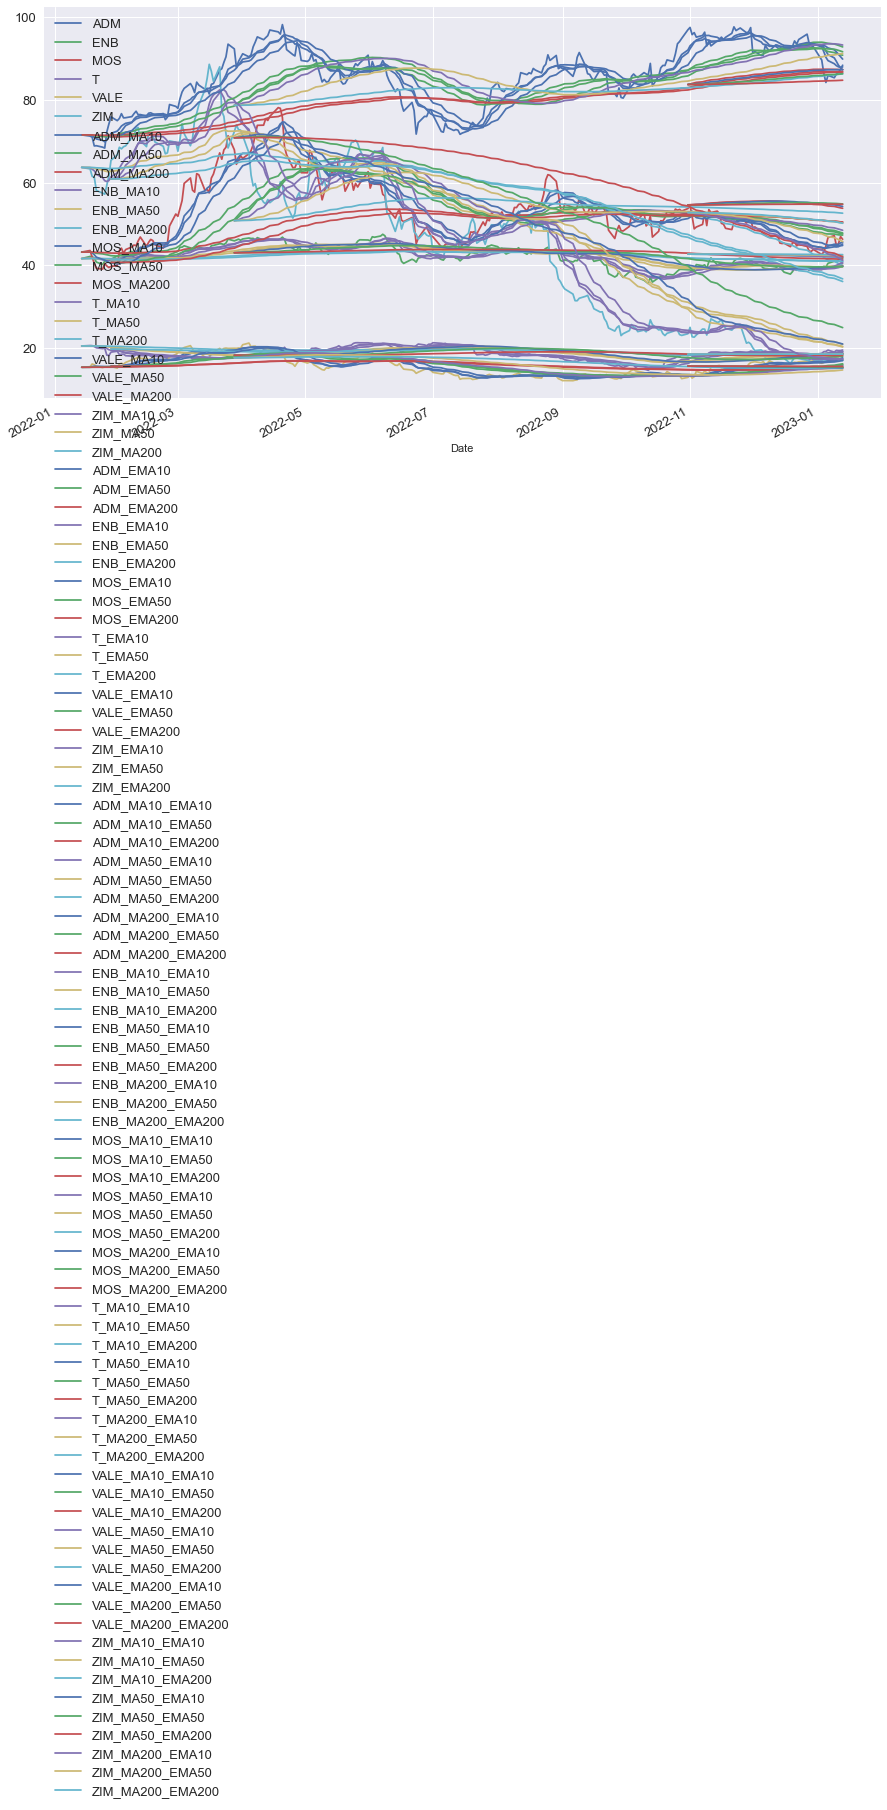

In [12]:
close.plot(figsize = (15,8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [14]:
# lets normalize our data so we can start on the same starting point for all the stocks
# to do this, we take the close price from the first record in the time series, then we divide all of the 
# other stock close number by that value. from there, we multiply the numbers again by 100 to get a positive number
norm = ema.div(ema.iloc[0]).mul(100)

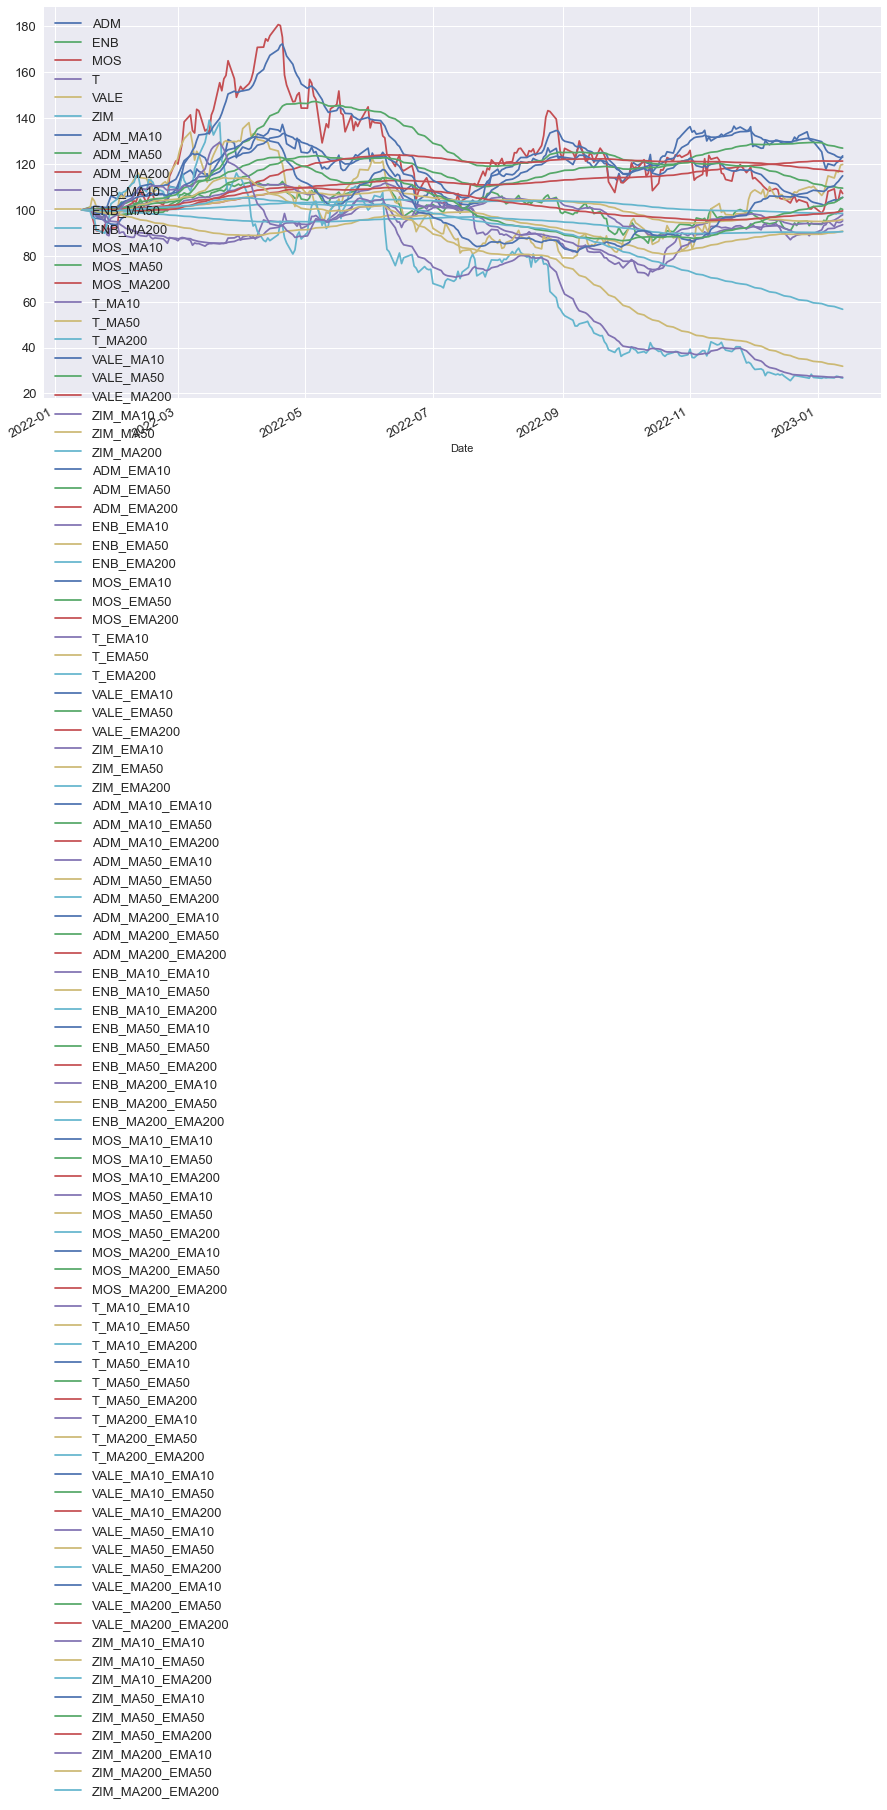

In [15]:
norm.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [16]:
norm.describe()

,ADM,ENB,MOS,T,VALE,ZIM,ADM_MA10,ADM_MA50,ADM_MA200,ENB_MA10,...,VALE_MA200_EMA200,ZIM_MA10_EMA10,ZIM_MA10_EMA50,ZIM_MA10_EMA200,ZIM_MA50_EMA10,ZIM_MA50_EMA50,ZIM_MA50_EMA200,ZIM_MA200_EMA10,ZIM_MA200_EMA50,ZIM_MA200_EMA200
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,119.645466,101.259485,123.217149,90.652533,102.288893,72.562746,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,10.233904,6.369341,19.042167,7.177028,14.952190,31.359914,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,95.555555,85.501678,90.469584,71.266076,78.933682,25.573000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,112.809220,96.879498,108.605134,87.343630,88.491548,39.073783,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,120.950380,101.272201,120.495028,89.874172,101.430431,76.609103,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,127.386438,105.928952,134.501502,94.891532,111.996094,100.047094,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,137.274629,114.090252,180.777243,103.854593,138.036407,139.120882,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#in order to get daily returns, use the shift() method
lag1 = ema.shift(periods = 1)

In [18]:
adm = ema.ADM.copy().to_frame()

In [19]:
adm["lag1"] = adm.shift(periods = 1)

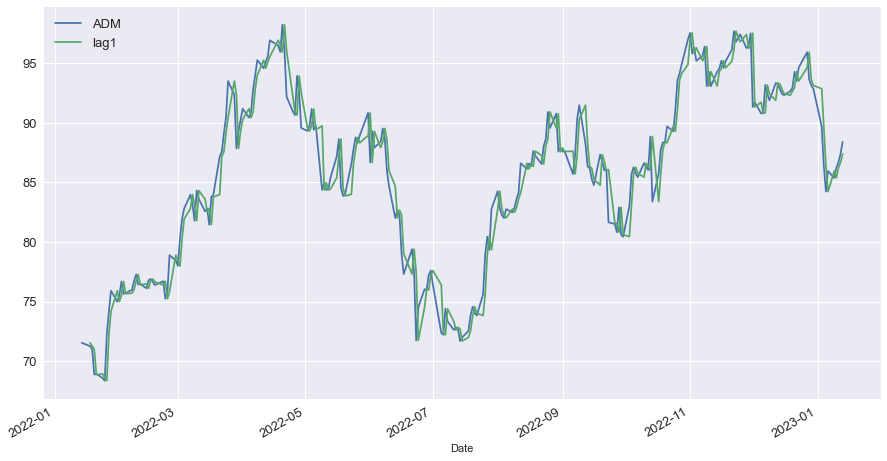

In [20]:
adm.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [ ]:
# close["adm_diff"] = close.ADM.sub(close.ADM.shift(periods = 1)

In [21]:
#or we can just use the diff and pct_change methods - which is supposed to do the same thing but....
adm["adm_chg_pct"] = ema.ADM.pct_change()

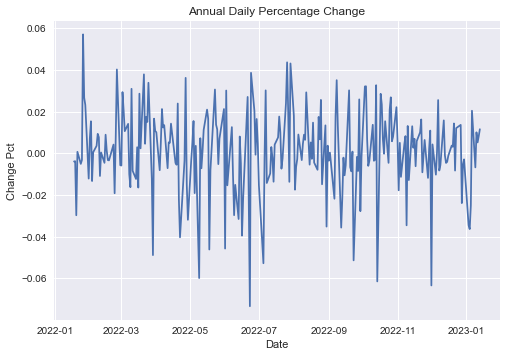

In [22]:

from importlib import reload
plt=reload(plt)

plt.plot(figsize = (100, 8 ), fontsize = 13)
plt.plot(adm["adm_chg_pct"])

plt.xlabel("Date")
plt.ylabel("Change Pct")
plt.title("Annual Daily Percentage Change")

# Display

plt.show()

In [23]:
adm.head()

,ADM,lag1,adm_chg_pct
Date,,,
2022-01-14,71.550003,NaN,NaN
2022-01-18,71.269997,71.550003,-0.003913
2022-01-19,71.000000,71.269997,-0.003788
2022-01-20,68.889999,71.000000,-0.029718
2022-01-21,68.940002,68.889999,0.000726
